# Lane Lines Detection using OpenCV 

## 1. Importing packages

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import glob
from moviepy.editor import VideoFileClip

%matplotlib inline

## 1. Loading test images

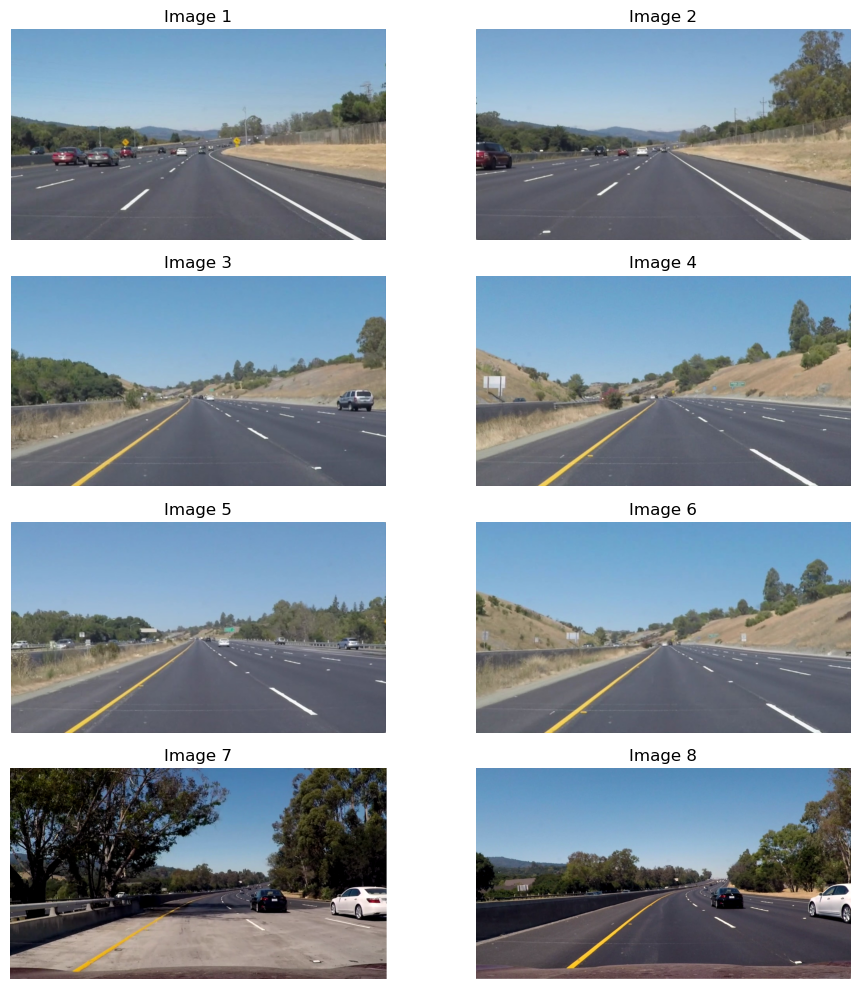

In [40]:
#Reading in the test images
folder_path = "Data/Test data/"
image_list = [mpimg.imread(f"{folder_path}{i}.jpg") for i in range(1, 9)]

# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(image_list):
    axs[i].imshow(image)
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

## 2. Color Selection

When detecting lane lines in images, choosing the most suitable color space is crucial for accurately highlighting the lane lines. Color spaces represent colors in different ways, and some color spaces are better suited for certain tasks than others. In the context of lane detection, we need a color space where the lane lines are clearly distinguishable from the rest of the image.For lane detection, we're interested in isolating white and yellow colors, which are common in lane markings.

### Filters Used for Color Selection:

1. **RGB Color Space**: In RGB color space, an image is represented by three channels: Red, Green, and Blue. We can apply filters to select pixels that fall within predefined ranges for white and yellow.

2. **LAB Color Space**: The LAB color space consists of three channels: L (lightness), A (green to magenta), and B (blue to yellow). It's designed to mimic human vision more closely than RGB and is often used for tasks like color correction and image segmentation. In the LAB color space, we can define ranges of the A and B channels to select white and yellow pixels.

3. **YUV Color Space**: The YUV color space separates color information from brightness information. The Y channel represents the brightness (luminance), while the U and V channels represent the color information (chrominance). By thresholding the U and V channels, we can isolate specific colors. For lane detection, we can define ranges of the U and V channels to select white and yellow pixels.


  
4. **HSV Color Space**: HSV (Hue, Saturation, Value) color space separates color information from brightness information. This separation can make it easier to isolate colors of interest. We can define ranges of hue, saturation, and value to select white and yellow pixels.
  
5. **HSL Color Space**: HSL (Hue, Saturation, Lightness) color space is similar to HSV but uses different representations for brightness. It also separates color and brightness information, making it suitable for color selection tasks. We can define ranges of hue, saturation, and lightness to select white and yellow pixels.

These filters are commonly used for color selection tasks due to their effectiveness in isolating specific colors. However, the most suitable color space depends on factors such as lighting conditions, camera characteristics, and the nature of the lane markings. Experimentation with different color spaces and thresholds is often necessary to determine the best approach for a particular scenario.

### RGB color selection

   - In this filter, we convert the RGB image into its three primary color channels: Red, Green, and Blue.
   - We define thresholds for each channel to isolate pixels that correspond to white and yellow colors, typically found in lane markings.
   - Pixels that meet the specified threshold conditions are retained, while others are discarded, resulting in a binary mask where white and yellow lane markings are highlighted.


In [41]:
def RGB_color_selection(image):
    
    #White color mask
    lower_threshold = np.uint8([200, 200, 200])
    upper_threshold = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(image, lower_threshold, upper_threshold)
    
    #Yellow color mask
    lower_threshold = np.uint8([175, 175,   0])
    upper_threshold = np.uint8([255, 255, 255])
    yellow_mask = cv2.inRange(image, lower_threshold, upper_threshold)
    
    #Combine white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_image = cv2.bitwise_and(image, image, mask = mask)
    
    return masked_image

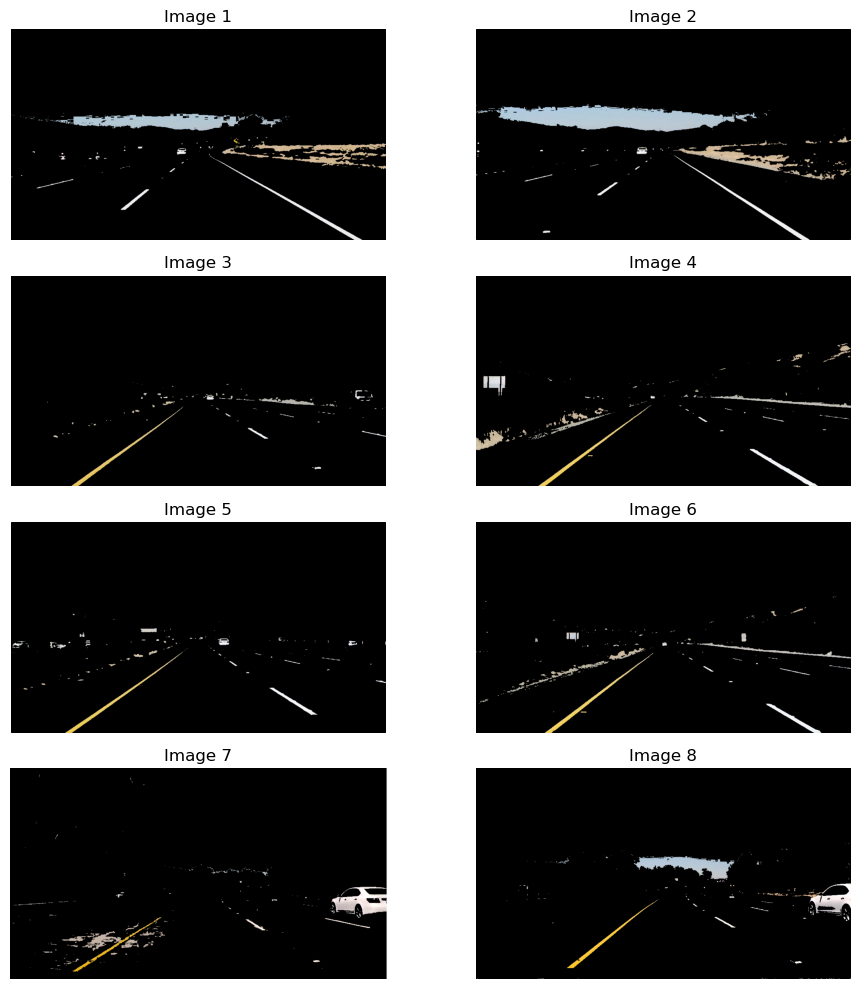

In [42]:
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(image_list):
    image = RGB_color_selection(image)
    axs[i].imshow(image)
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

### Lab Color Space

We will convert image to lab color space and then apply filter

   - LAB color space comprises three channels: L (lightness), A (green to magenta), and B (blue to yellow).
   - We convert the RGB image into the LAB color space.
   - Next, we define thresholds for the A and B channels to select pixels representing white and yellow colors.
   - This approach helps in capturing subtle variations in color that may not be evident in other color spaces, enhancing the detection of lane markings.


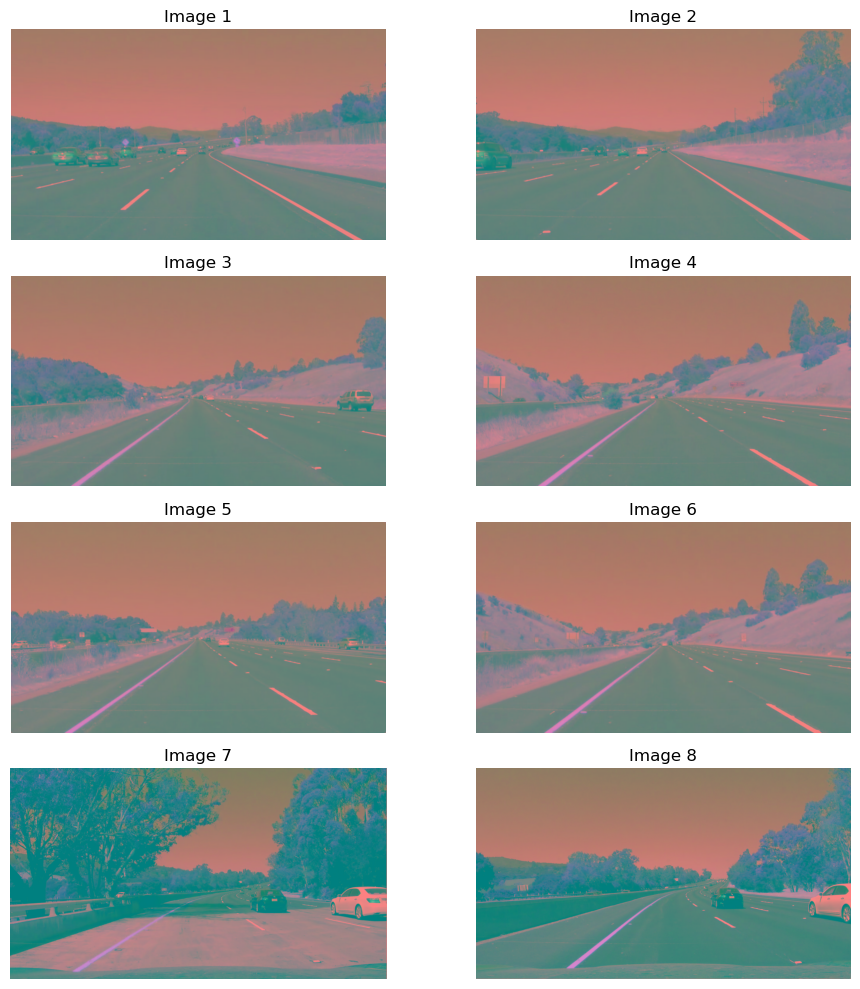

In [43]:
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(image_list):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    axs[i].imshow(image)
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

In [44]:
def lab_color_selection(image):
    # Convert image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

    # Define range for white and yellow in LAB
    white_lower = np.array([200, 128, 128], dtype=np.uint8)
    white_upper = np.array([255, 128, 128], dtype=np.uint8)
    yellow_lower = np.array([20, 128, 128], dtype=np.uint8)
    yellow_upper = np.array([255, 255, 128], dtype=np.uint8)

    # Create masks
    white_mask = cv2.inRange(lab_image, white_lower, white_upper)
    yellow_mask = cv2.inRange(lab_image, yellow_lower, yellow_upper)
    color_mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_img = cv2.bitwise_and(image,image,mask = color_mask)

    return masked_img

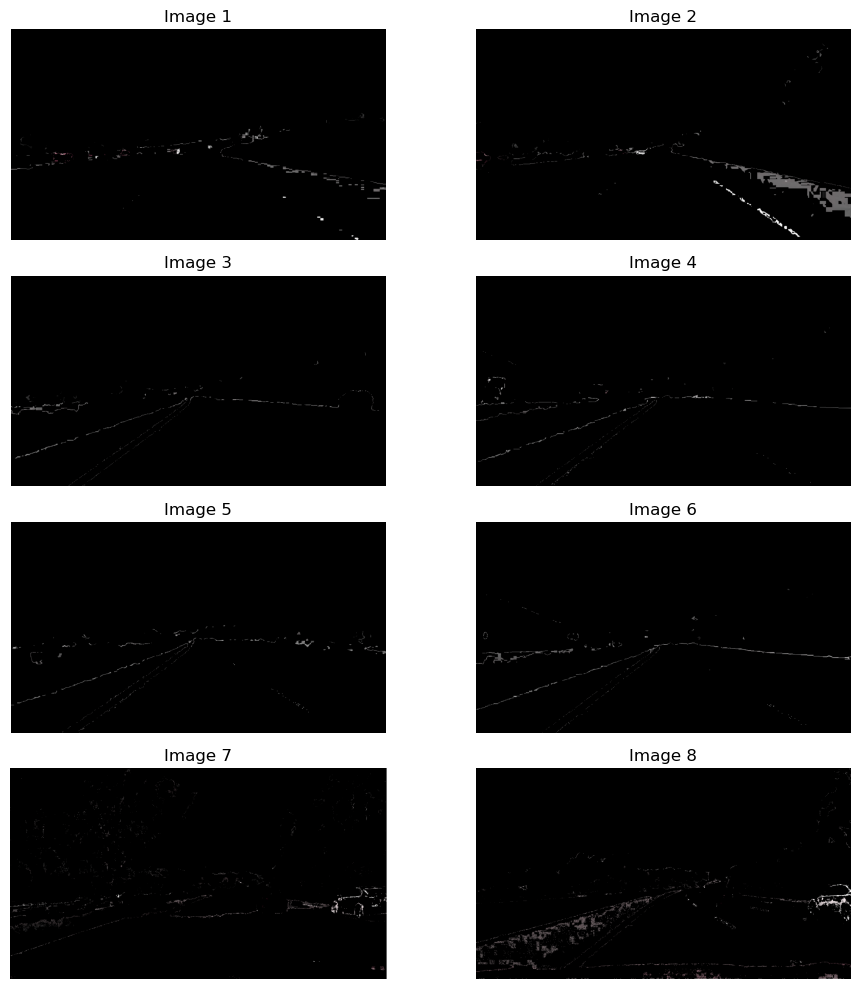

In [45]:
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(image_list):
    image = lab_color_selection(image)
    axs[i].imshow(image,cmap='gray')
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

### YUV color space

   - YUV color space separates color and brightness information.
   - We convert the RGB image into the YUV color space.
   - Then, we define thresholds for the U and V channels to select pixels corresponding to white and yellow colors.
   - By applying these thresholds, we can identify regions in the image that contain white and yellow colors, aiding in the detection of lane markings.


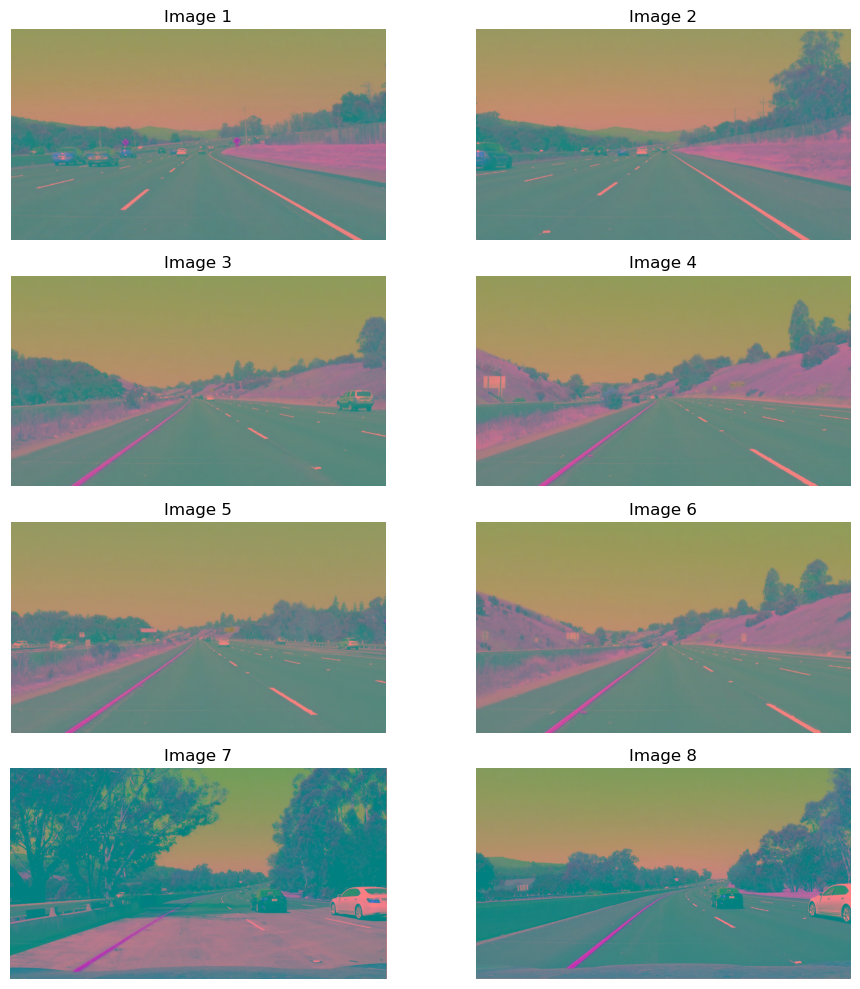

In [46]:
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(image_list):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    axs[i].imshow(image)
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

In [47]:
def yuv_color_selection(image):
    # Convert image to YUV color space
    yuv_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

    # Define range for white and yellow in YUV
    white_lower = np.array([0, 128, 128], dtype=np.uint8)
    white_upper = np.array([255, 148, 148], dtype=np.uint8)
    yellow_lower = np.array([20, 128, 128], dtype=np.uint8)
    yellow_upper = np.array([255, 255, 148], dtype=np.uint8)

    # Create masks
    white_mask = cv2.inRange(yuv_image, white_lower, white_upper)
    yellow_mask = cv2.inRange(yuv_image, yellow_lower, yellow_upper)
    color_mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_img = cv2.bitwise_and(image,image,mask = color_mask)

    return masked_img

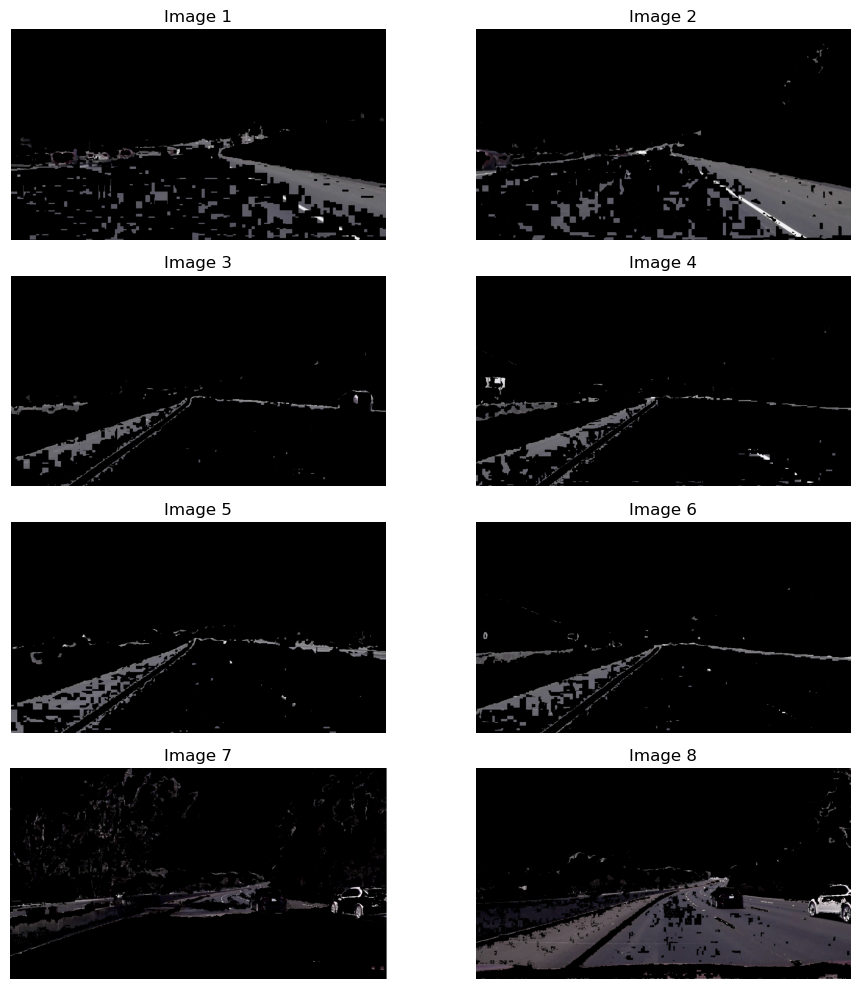

In [48]:
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(image_list):
    image = yuv_color_selection(image)
    axs[i].imshow(image)
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

### HSV color space

   - Similar to HSV, the HSL color space separates color and brightness information.
   - We convert the RGB image into the HSL color space.
   - Then, we define thresholds for hue, saturation, and lightness components to select pixels corresponding to white and yellow colors.
   - By tuning these thresholds, we can effectively highlight the lane markings in the image.


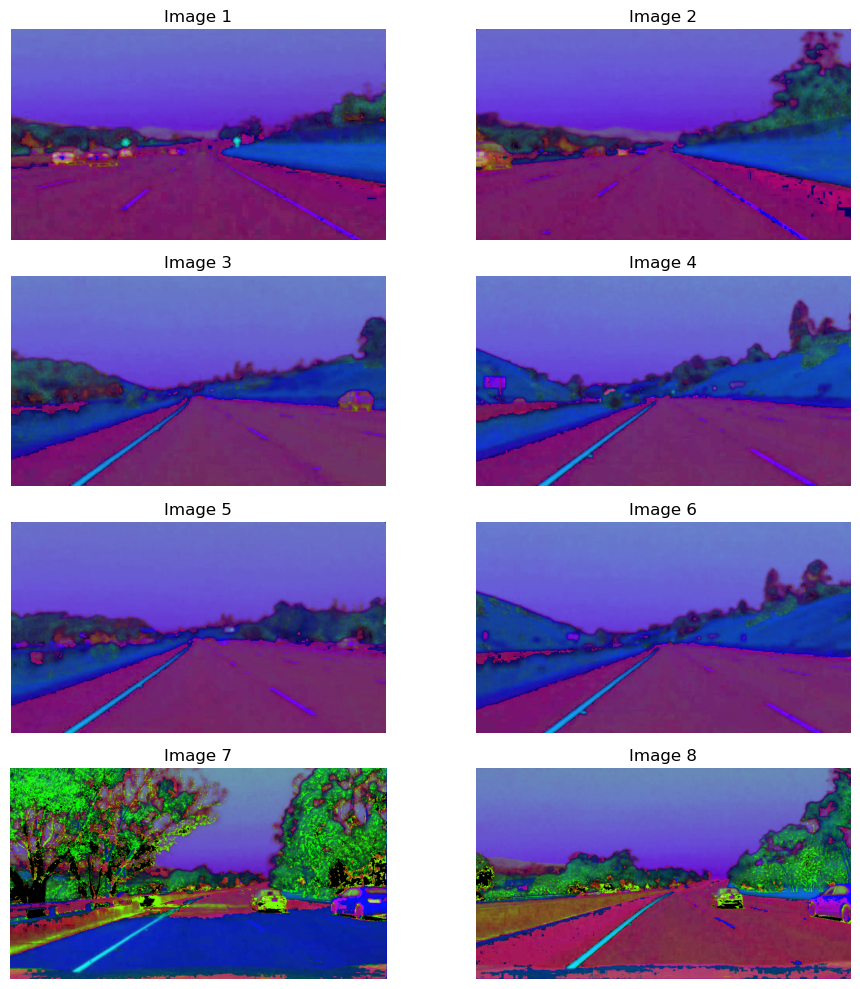

In [49]:
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(image_list):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    axs[i].imshow(image)
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

In [50]:
def HSV_color_selection(image):
    #Convert the input image to HSV
    converted_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    #White color mask
    lower_threshold = np.uint8([0, 0, 210])
    upper_threshold = np.uint8([255, 30, 255])
    white_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Yellow color mask
    lower_threshold = np.uint8([18, 80, 80])
    upper_threshold = np.uint8([30, 255, 255])
    yellow_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Combine white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_image = cv2.bitwise_and(image, image, mask = mask)
    
    return masked_image

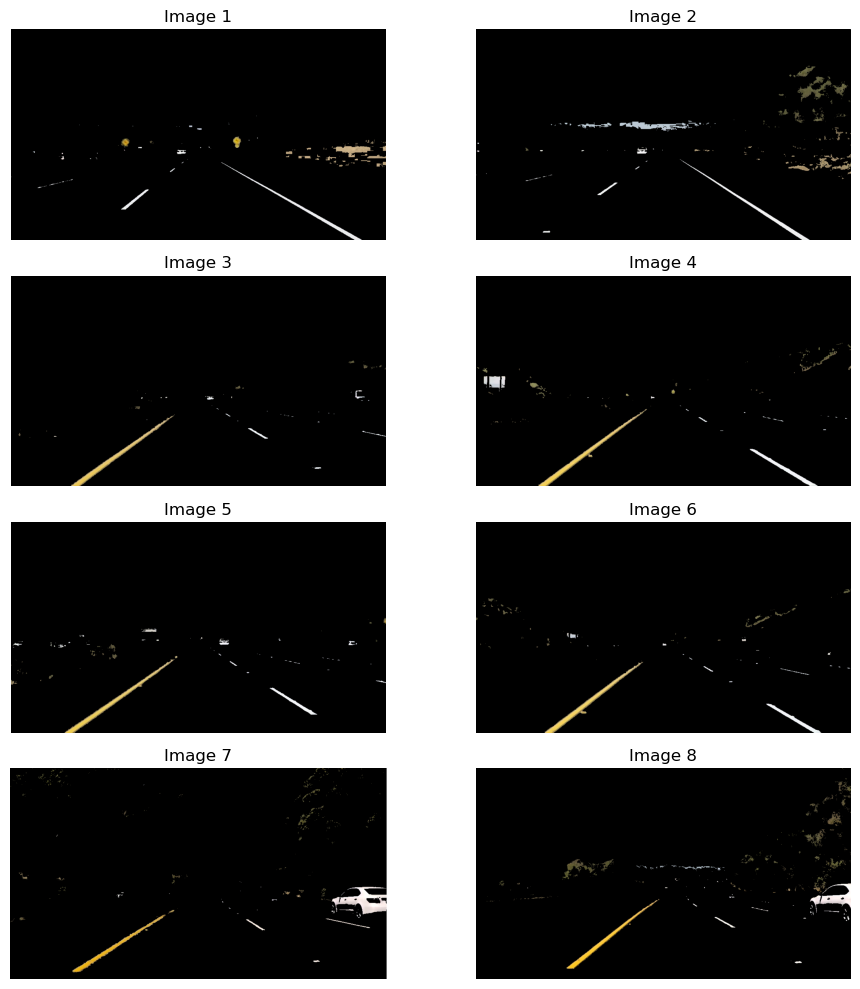

In [51]:
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(image_list):
    image = HSV_color_selection(image)
    axs[i].imshow(image)
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

### HSL color space

   - HSV color space separates color information from brightness information.
   - We convert the RGB image into the HSV color space.
   - Next, we define thresholds for hue, saturation, and value components to select pixels representing white and yellow colors.
   - By adjusting these thresholds, we can isolate the desired colors, which helps in highlighting the lane markings against varying backgrounds and lighting conditions.


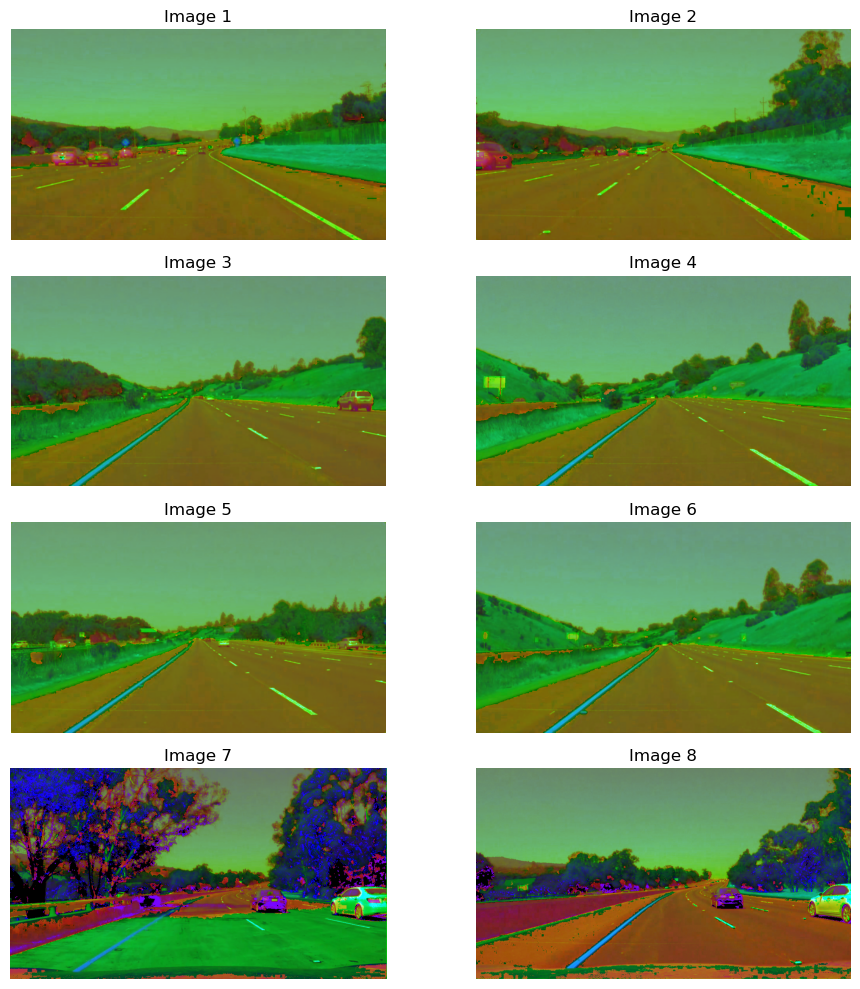

In [52]:
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(image_list):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    axs[i].imshow(image)
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

In [53]:
def HSL_color_selection(image):
    
    #Convert the input image to HSL
    converted_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    
    #White color mask
    lower_threshold = np.uint8([0, 200, 0])
    upper_threshold = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Yellow color mask
    lower_threshold = np.uint8([10, 0, 100])
    upper_threshold = np.uint8([40, 255, 255])
    yellow_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Combine white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_image = cv2.bitwise_and(image, image, mask = mask)
    
    return masked_image

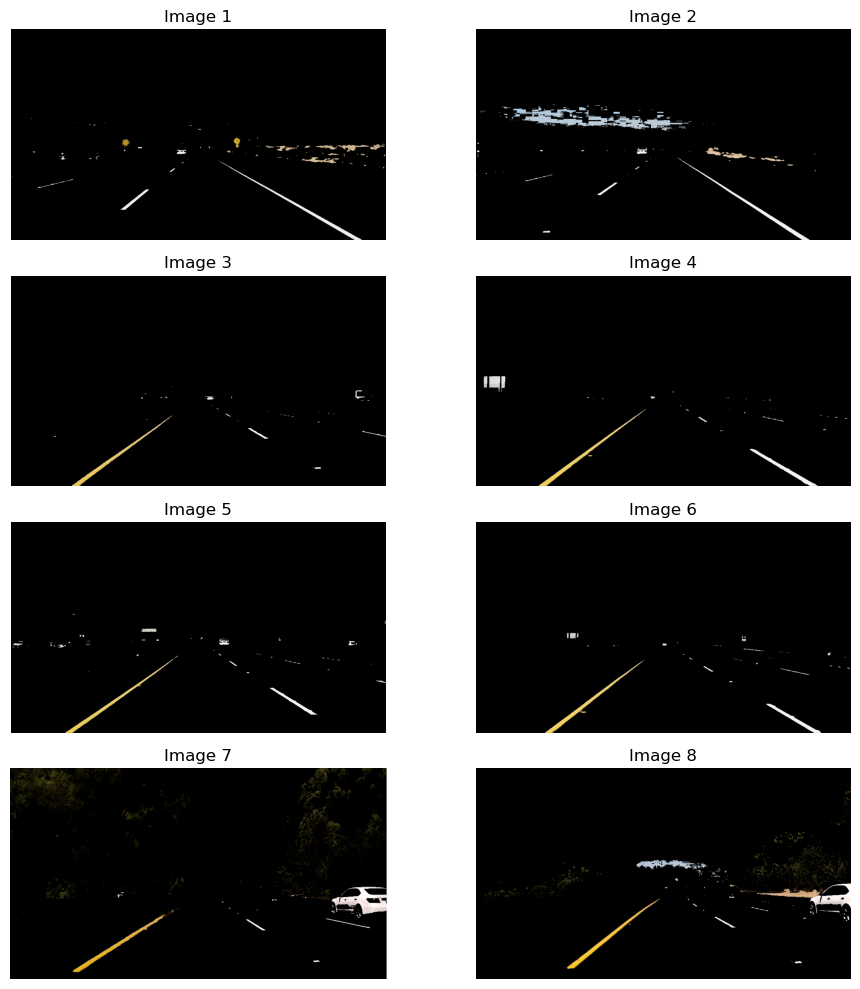

In [54]:
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(image_list):
    image = HSL_color_selection(image)
    axs[i].imshow(image)
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

We will be using HSL as it produces the clearest lane lines of all color spaces. We will use them for the next steps.

In [55]:
color_selected_images = list()
for i, image in enumerate(image_list):
    color_selected_images.append(HSL_color_selection(image))

## 3. Canny Edge Detection

Canny edge detection is a popular technique in computer vision and image processing used to detect edges in images. Developed by John Canny in 1986, it is widely employed in various applications such as object detection, image segmentation, and lane detection.

Here's how the Canny edge detection algorithm works:

1. **Gaussian Smoothing**:
   - The first step in Canny edge detection is to reduce noise in the image by applying Gaussian smoothing.
   - This is done by convolving the image with a Gaussian filter kernel, which blurs the image and reduces high-frequency noise.
   - Smoothing helps to remove small details and imperfections in the image while preserving the larger structures, making edge detection more robust.

2. **Gradient Calculation**:
   - Next, the algorithm calculates the gradient magnitude and direction at each pixel in the smoothed image.
   - The gradient magnitude represents the rate of change of intensity at each pixel, while the gradient direction indicates the direction of the steepest increase in intensity.
   - Typically, the Sobel operator is used to compute the gradient magnitude and direction in the horizontal and vertical directions.

3. **Non-Maximum Suppression**:
   - After computing the gradient magnitude and direction, non-maximum suppression is applied to thin the edges and preserve only the strongest edges.
   - This involves scanning the image and suppressing (setting to zero) all gradient values except for those that correspond to local maxima along the direction of the gradient.
   - Non-maximum suppression helps to produce thin, continuous edges by removing redundant gradient values.
4. **Double Thresholding**:

    - Apply two thresholds to the gradient magnitudes: a high threshold and a low threshold.
    - Pixels with gradient magnitudes above the high threshold are classified as strong edge pixels.
    - Pixels with gradient magnitudes between the high and low thresholds are classified as weak edge pixels.
    - Pixels with gradient magnitudes below the low threshold are suppressed (considered as non-edge pixels).
    
5. **Edge Tracking by Hysteresis**:
   - Finally, edge tracking by hysteresis is performed to link the remaining edge pixels into continuous curves.
   - This involves setting two thresholds: a high threshold and a low threshold.
   - Pixels with gradient magnitudes above the high threshold are considered strong edge pixels, while those between the low and high thresholds are considered weak edge pixels.
   - Weak edge pixels are only retained if they are connected to strong edge pixels. This helps to fill in gaps and complete edges, resulting in robust edge detection.

The output of the Canny edge detection algorithm is a binary image where edge pixels are represented by white pixels and non-edge pixels by black pixels. This output can then be used for further processing or analysis, such as object detection or image segmentation.

### a) Gray scaling the images

The Canny edge detection algorithm measures the intensity gradients of each pixel. So, we need to convert the images into gray scale in order to detect edges.

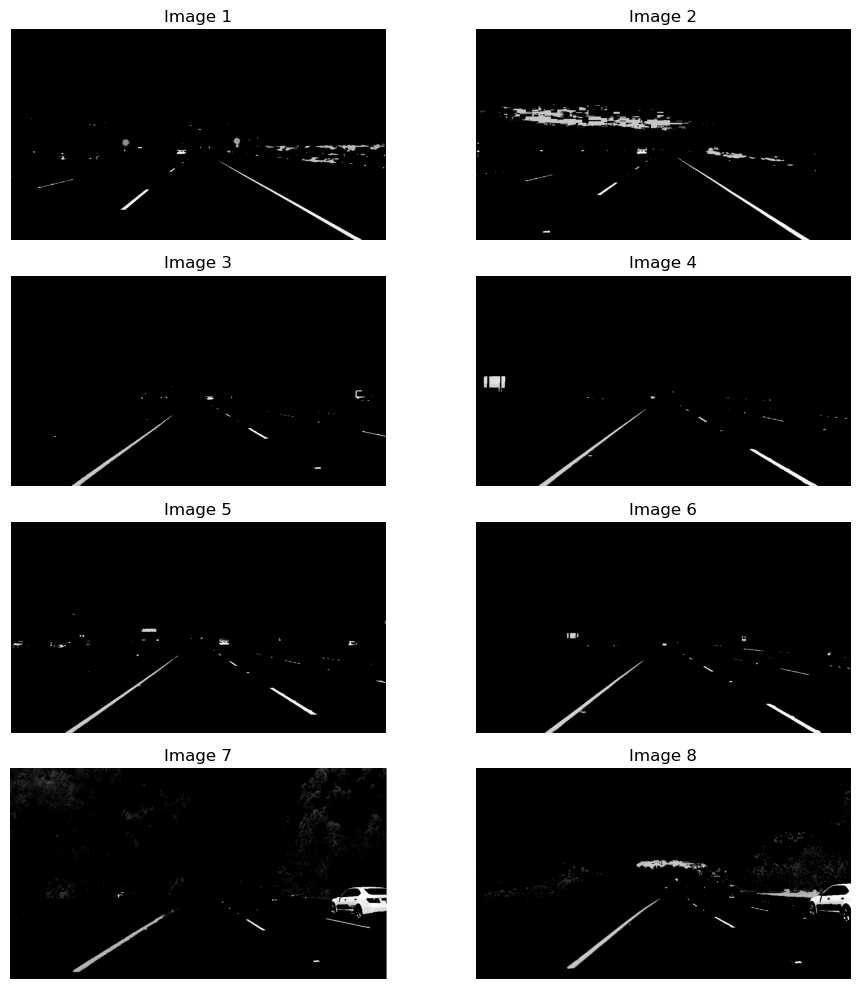

In [56]:
gray_images = []
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(color_selected_images):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray_images.append(image)
    axs[i].imshow(image,cmap = 'gray')
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

### b) Applying Gaussian smoothing

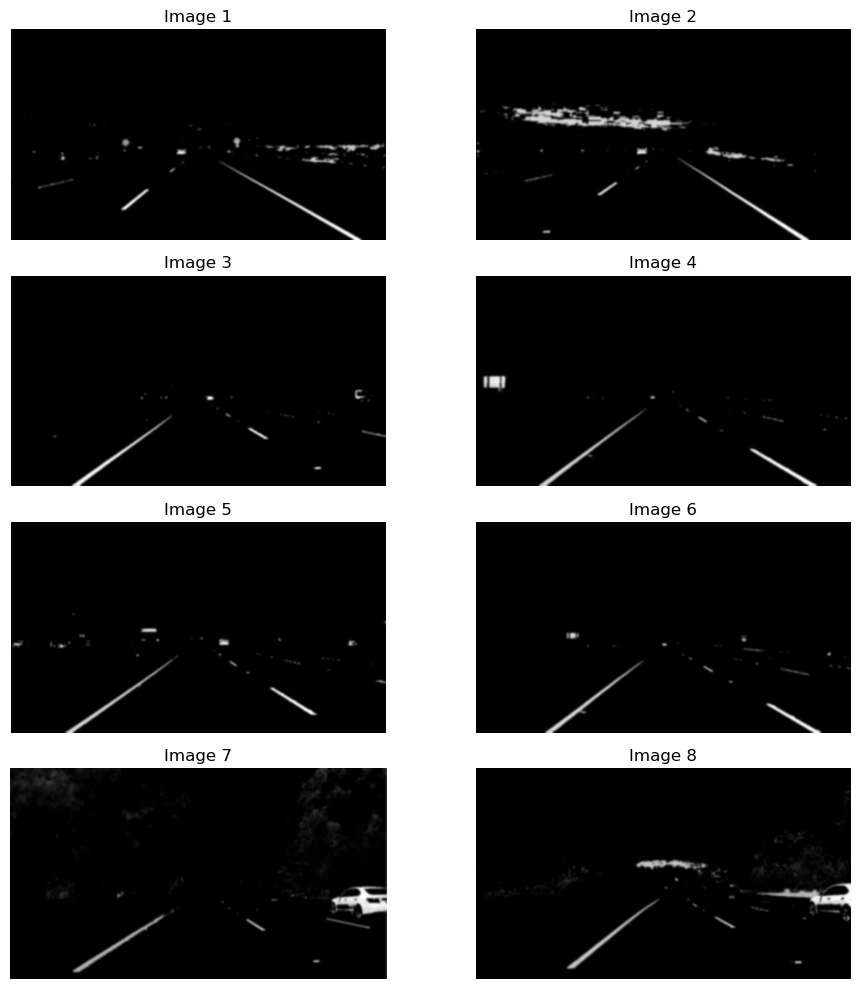

In [57]:
blur_images=[]
kernel_size = 13
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(gray_images):
    
    image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    blur_images.append(image)
    axs[i].imshow(image,cmap = 'gray')
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

### c) Applying Canny Edge Detection

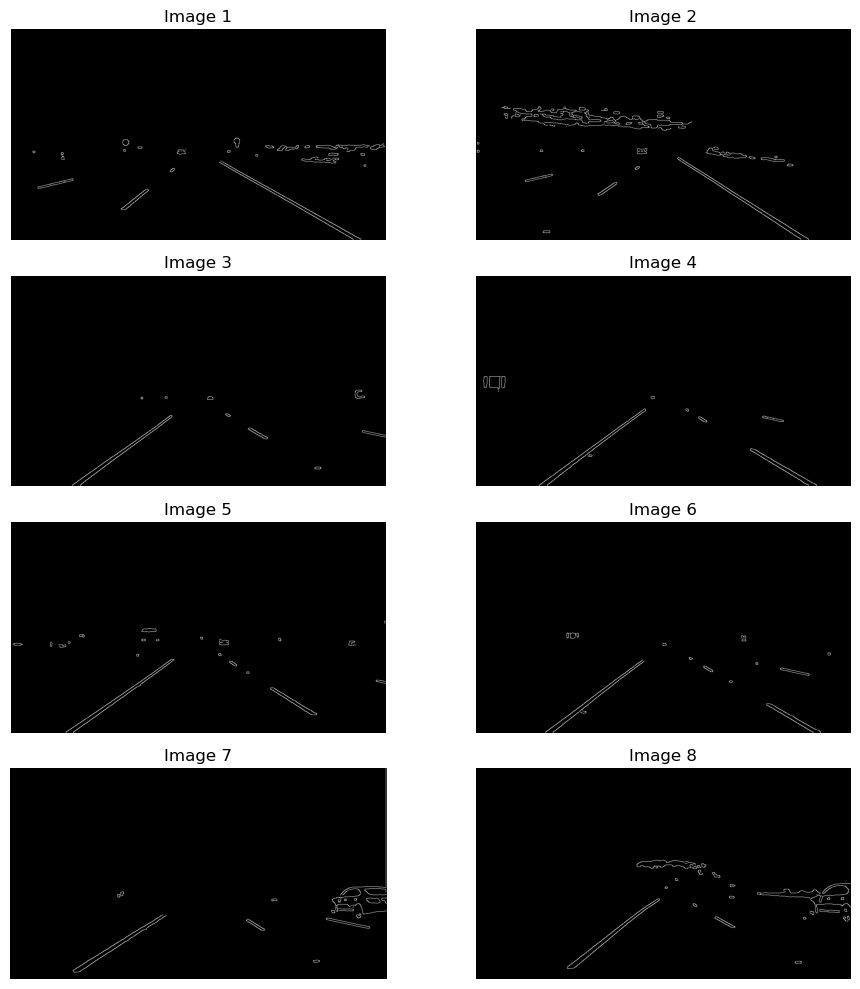

In [58]:
low_threshold = 50
high_threshold = 150
edge_images = []
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(blur_images):
    image = cv2.Canny(image, low_threshold, high_threshold)
    edge_images.append(image)
    axs[i].imshow(image,cmap = 'gray')
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()



## 4. Region of interest

We're interested in the area facing the camera, where the lane lines are found. So, we'll apply region masking to cut out everything else.

In [59]:
def region_selection(image):
    mask = np.zeros_like(image)   
    
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    
    rows, cols = image.shape[:2]
    bottom_left  = [cols * 0.1, rows * 0.95]
    top_left     = [cols * 0.4, rows * 0.6]
    bottom_right = [cols * 0.9, rows * 0.95]
    top_right    = [cols * 0.6, rows * 0.6]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

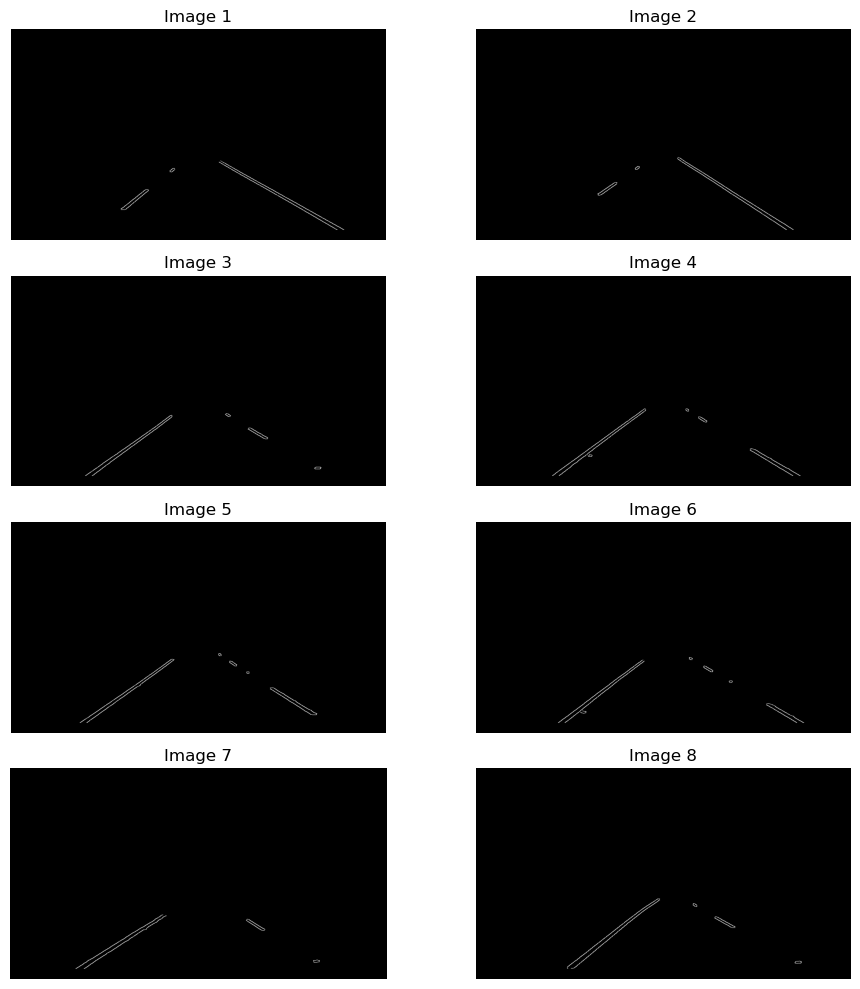

In [60]:
masked_images = []
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(edge_images):
    image = region_selection(image)
    masked_images.append(image)
    axs[i].imshow(image,cmap = 'gray')
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

## 5. Hough Transform

The Hough Transform is a powerful technique in image processing used for detecting shapes, particularly lines and curves. It was initially developed by Paul Hough in 1962 for detecting lines in images. The Hough Transform works by converting features in an image space into parametric space, making it easier to detect patterns that might be obscured or distorted in the original image.

Here's a brief overview of how the Hough Transform works:

1. **Edge Detection**: Before applying the Hough Transform, you typically perform edge detection using techniques like the Canny Edge Detector to identify points in the image where there are sharp changes in intensity, which often correspond to edges of objects.


2. **Parameterization**: In the Hough Transform, each point in the edge-detected image is represented as a line in parameter space. For example, in the case of detecting lines, each point (x, y) in the image space corresponds to a line in the parameter space (ρ, θ), where ρ represents the perpendicular distance from the origin to the line and θ represents the angle formed by the perpendicular from the origin to the line.


3. **Accumulator Array**: A 2D array called the accumulator array or Hough space is used to represent the parameter space. Each cell in this array corresponds to a specific combination of parameters (ρ, θ). Initially, all cells in the accumulator array are set to zero.


4. **Voting**: For each edge point in the edge-detected image, a vote is cast in the accumulator array for all possible lines that could pass through that point. This essentially means incrementing the corresponding cells in the accumulator array.


5. **Finding Peaks**: After all votes are cast, peaks in the accumulator array are identified. These peaks correspond to the parameters (ρ, θ) of the lines that are most likely to represent real features in the image.


6. **Thresholding and Line Detection**: Optionally, a threshold can be applied to the accumulator array to filter out weak detections. Then, lines corresponding to the remaining peaks are identified and drawn onto the original image.

The Hough Transform can be extended to detect other shapes such as circles or ellipses by using different parameterizations and accumulator array structures tailored to those shapes.

Overall, the Hough Transform is a robust technique for detecting patterns in images, especially when those patterns can be described parametrically. However, it can be computationally expensive, particularly for large images or complex shapes, and tuning parameters such as threshold values can require some trial and error.

In [61]:
def hough_transform(image):

    rho = 1              #Distance resolution of the accumulator in pixels.
    theta = np.pi/180    #Angle resolution of the accumulator in radians.
    threshold = 20       #Only lines that are greater than threshold will be returned.
    minLineLength = 20   #Line segments shorter than that are rejected.
    maxLineGap = 300     #Maximum allowed gap between points on the same line to link them
    return cv2.HoughLinesP(image, rho = rho, theta = theta, threshold = threshold,
                           minLineLength = minLineLength, maxLineGap = maxLineGap)

`hough_lines` contains the list of lines detected in the selected region. Now, we will draw these detected lines onto the original `test_images`.

In [62]:
hough_lines = list(map(hough_transform, masked_images))

In [63]:
def draw_lines(image, lines, color = [255, 0, 0], thickness = 2):
    
    image = np.copy(image)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image, (x1, y1), (x2, y2), color, thickness)
    return image

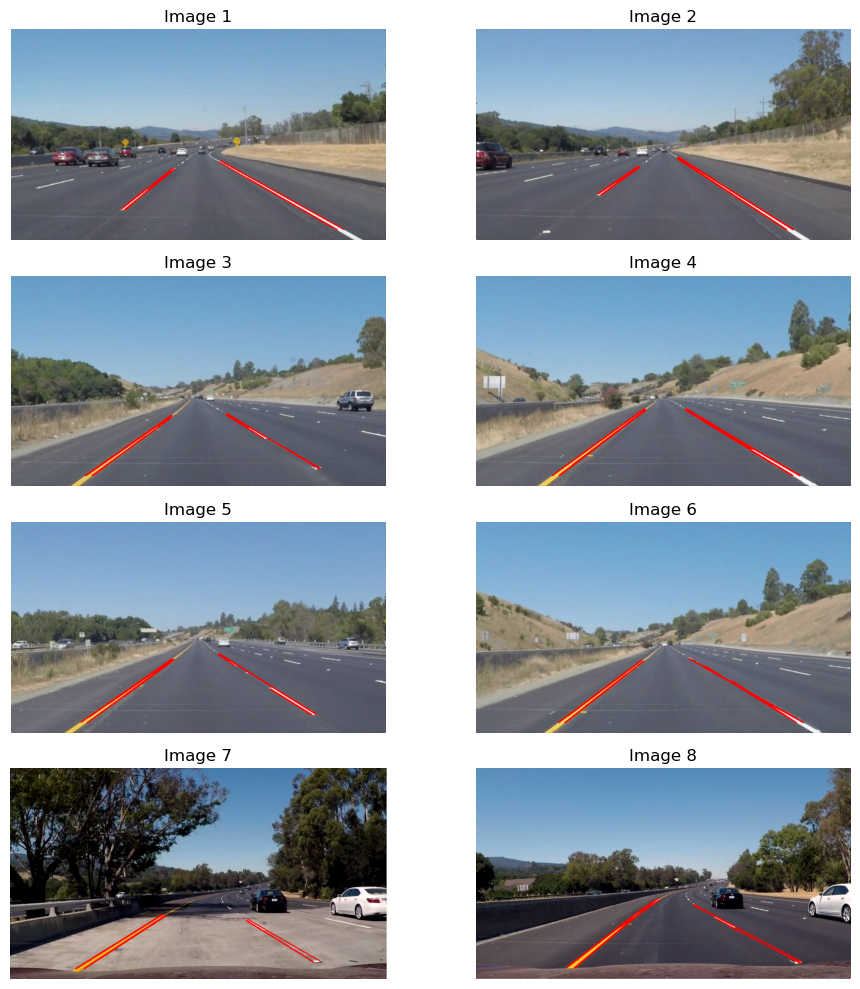

In [64]:
line_images = []
for image, lines in zip(image_list, hough_lines):
    line_images.append(draw_lines(image, lines))
    

fig, axs = plt.subplots(4, 2, figsize=(10, 10))
axs = axs.flatten()

for i, image in enumerate(line_images):
    gray_images.append(image)
    axs[i].imshow(image,cmap = 'gray')
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()

## 6. Averaging and extrapolating the lane lines

We have multiple lines detected for each lane line. We need to average all these lines and draw a single line for each lane line.
We also need to extrapolate the lane lines to cover the full lane line length.

In [65]:
def average_slope_intercept(lines):
    
    left_lines    = [] #(slope, intercept)
    left_weights  = [] #(length,)
    right_lines   = [] #(slope, intercept)
    right_weights = [] #(length,)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x1 == x2:
                continue
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - (slope * x1)
            length = np.sqrt(((y2 - y1) ** 2) + ((x2 - x1) ** 2))
            if slope < 0:
                left_lines.append((slope, intercept))
                left_weights.append((length))
            else:
                right_lines.append((slope, intercept))
                right_weights.append((length))
    left_lane  = np.dot(left_weights,  left_lines) / np.sum(left_weights)  if len(left_weights) > 0 else None
    right_lane = np.dot(right_weights, right_lines) / np.sum(right_weights) if len(right_weights) > 0 else None
    return left_lane, right_lane

In [66]:
def pixel_points(y1, y2, line):
    
    if line is None:
        return None
    slope, intercept = line
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    y1 = int(y1)
    y2 = int(y2)
    return ((x1, y1), (x2, y2))

In [67]:
def lane_lines(image, lines):
    left_lane, right_lane = average_slope_intercept(lines)
    y1 = image.shape[0]
    y2 = y1 * 0.6
    left_line  = pixel_points(y1, y2, left_lane)
    right_line = pixel_points(y1, y2, right_lane)
    return left_line, right_line

    
def draw_lane_lines(image, lines, color=[255, 0, 0], thickness=12):
    line_image = np.zeros_like(image)
    for line in lines:
        if line is not None:
            cv2.line(line_image, *line,  color, thickness)
    return cv2.addWeighted(image, 1.0, line_image, 1.0, 0.0)
             
    
lane_images = []
for image, lines in zip(image_list, hough_lines):
    lane_images.append(draw_lane_lines(image, lane_lines(image, lines)))

    


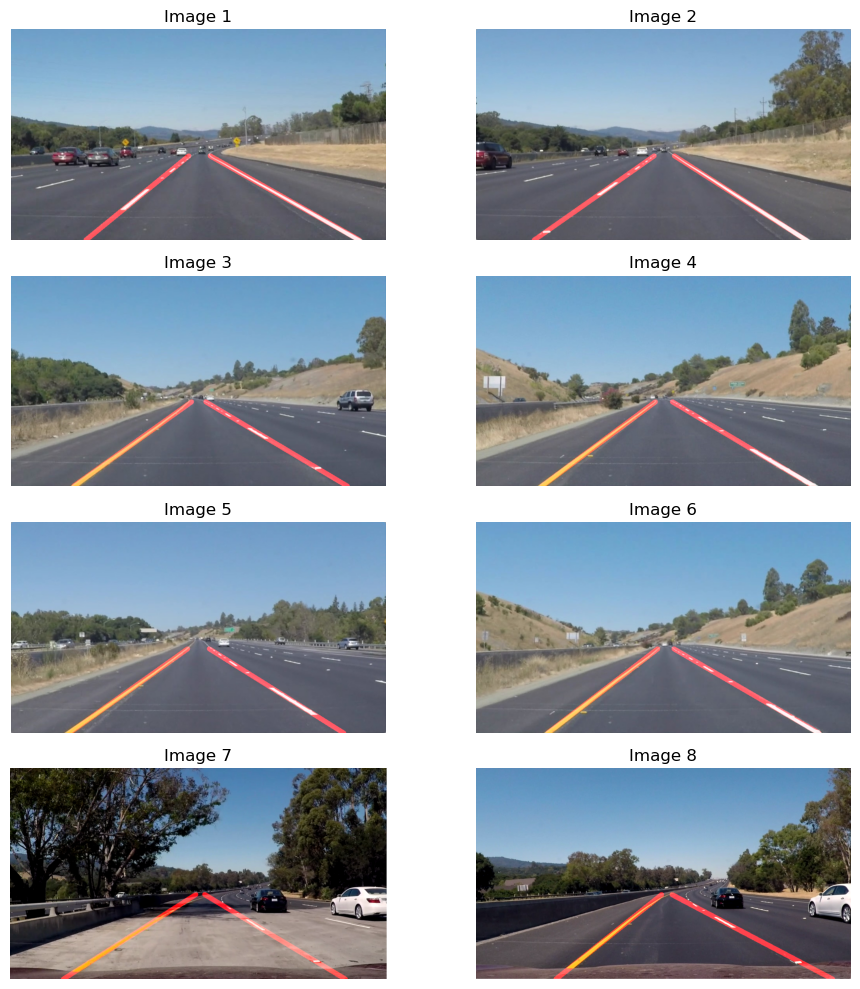

In [69]:
# Create a grid of 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the 4x2 array of axes into a list
axs = axs.flatten()

# Loop through each image and plot it
for i, image in enumerate(lane_images):
    
    axs[i].imshow(image,cmap = 'gray')
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'Image {i+1}')  # Set title

# Display the plot
plt.tight_layout()
plt.show()